In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
import scipy

# Reading Dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/bd_cricket/dataset/bd_cric.csv')

In [4]:
dataset.describe()
dataset.head(46)


,Date,Versus,\tGround,Result,Overseas,Toss,DayNight,Country,Continent,BatFirst,WorldCup
0,28/11/2006,Zimbabwe,Sheikh Abu Naser Stadium,W,0,0,0,Bangladesh,Subcontinet,1,0
1,01/09/2007,Kenya,Gymkhana Club Ground,W,1,1,0,Kenya,Africa,0,1
2,02/09/2007,Pakistan,Gymkhana Club Ground,L,1,1,0,Kenya,Africa,0,1
3,13/09/2007,West Indies,Wanderers Stadium,W,1,1,0,SouthAfrica,Africa,0,1
4,15/09/2007,South Africa,Newlands,L,1,0,1,SouthAfrica,Africa,1,1
5,16/09/2007,Australia,Newlands,L,1,0,0,SouthAfrica,Africa,1,1
6,18/09/2007,Sri Lanka,Wanderers Stadium,L,1,1,1,SouthAfrica,Africa,0,1
7,20/09/2007,Pakistan,Newlands,L,1,0,0,SouthAfrica,Africa,1,1
8,20/04/2008,Pakistan,National Stadium (Karachi),L,1,0,1,Pakistan,Subcontinet,0,0
9,05/11/2008,South Africa,Wanderers Stadium,L,1,1,1,SouthAfrica,Africa,0,0


# Checking Missing Values

In [5]:
def find_missing_value(data):
  missed_val = pd.DataFrame({'column_name':[],'missing_value':[],'missing_percentage':[]})
  for col in data.columns:
    sum_missing_value = data[col].isnull().sum()
    percent_miss_value = round(sum_missing_value/data.shape[0]*100,2)
    missed_val = missed_val.append(dict(zip(missed_val.columns,[col,sum_missing_value,percent_miss_value])),ignore_index = True)
  return missed_val  

In [6]:
missed_value = find_missing_value(dataset)
display(missed_value[missed_value['missing_percentage']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(missed_value[missed_value['missing_percentage']>0.0].shape[0])}")

,column_name,missing_value,missing_percentage




Number of columns with missing values:0


In [7]:
home_match = dataset[dataset['Overseas']==0]
away_match = dataset[dataset['Overseas']==1]
world_cup = dataset[dataset['WorldCup']==1]

In [8]:
dataset.replace({'Result':{'W':1,' W':1,'L':0,'L ':0,' L ':0,'NR':2}},inplace=True)

In [9]:
dataset['Result'].value_counts()

0    73
1    43
2     2
Name: Result, dtype: int64

#EDA

In [10]:
overseas_yes = dataset[dataset['Overseas']==1]
overseas_not = dataset[dataset['Overseas']==0]
ov_yes_count = overseas_yes[overseas_yes.columns[0]].count()
ov_not_count = overseas_not[overseas_not.columns[0]].count()
df =  dataset[dataset.columns[0]].count()


per_yes = ov_yes_count/df * 100
per_no = ov_not_count/df * 100

per = [per_yes,per_no]
per



[58.47457627118644, 41.52542372881356]

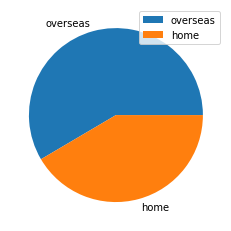

In [11]:
label = ['overseas','home']
plt.pie(per,labels=label)
plt.legend()
plt.show() 

In [12]:
toss_win = overseas[(overseas['Toss']==1) & (overseas['Result']==1)]
toss_loss = overseas[(overseas['Toss']==0)&(overseas['Result']==1)]
toss_win = toss_win[toss_win.columns[0]].count()
toss_loss = toss_loss[toss_loss.columns[0]].count()
label = ['Toss won','Toss Lost']
toss = [toss_win,toss_loss]
plt.pie(toss,labels= label)
plt.legend()
plt.show()
toss

NameError: ignored

In [13]:
toss_win = overseas[overseas['Toss']==1 ]
toss_win.hist(column='Result',by='\tGround',figsize= (15,10))

NameError: ignored

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f554c839b50>,
      dtype=object)

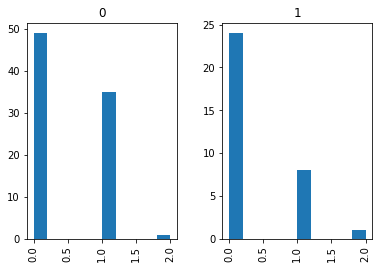

In [14]:
dataset.hist(column = 'Result',by='WorldCup')

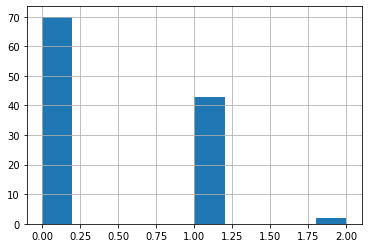

In [ ]:
dataset['Result'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47ab537550>,
      dtype=object)

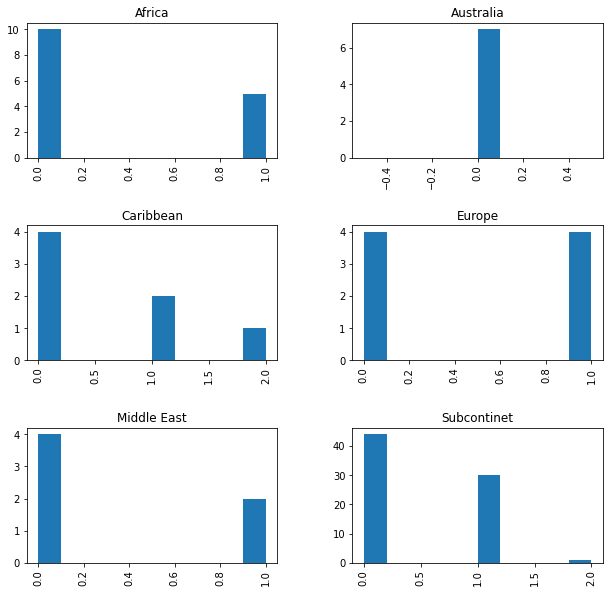

In [ ]:
dataset.hist(column='Result',by='Continent', figsize= (10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f42ab4bd210>,
      dtype=object)

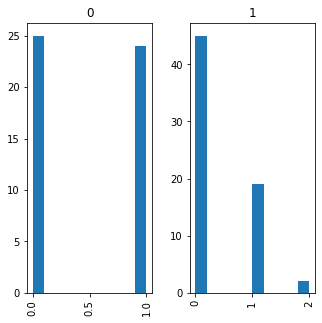

In [ ]:
dataset.hist(column='Result',by='Overseas', figsize= (5,5))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f42ab3c8b90>,
      dtype=object)

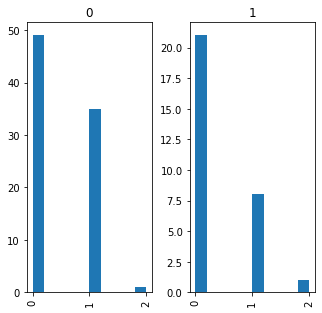

In [ ]:
dataset.hist(column='Result',by='WorldCup', figsize= (5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f42ab2def90>,
      dtype=object)

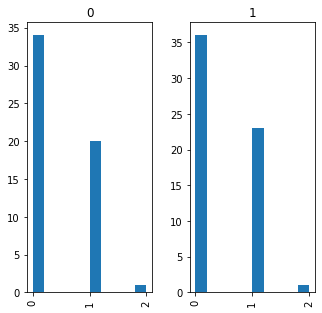

In [ ]:
dataset.hist(column='Result',by='Toss', figsize= (5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f42ab2e0290>,
      dtype=object)

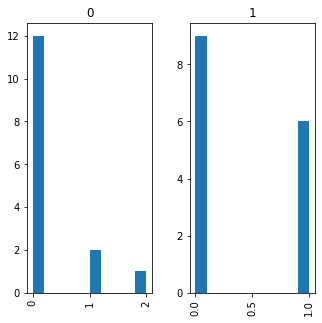

In [ ]:
world_cup.hist(column='Result',by='Toss', figsize= (5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f42aa510bd0>,
      dtype=object)

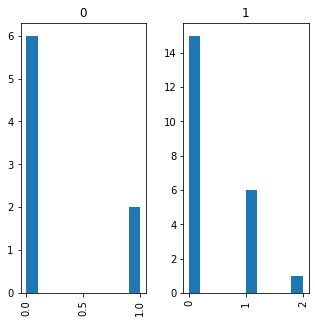

In [ ]:
world_cup.hist(column='Result',by='DayNight', figsize= (5,5))

In [ ]:
dataset['Country'].unique()

array(['Bangladesh', 'Kenya', 'SouthAfrica', 'Pakistan', 'England',
       'St Kitts', 'New Zealand', 'St Lucia', 'Barbados', 'Ireland',
       'Netherlands', 'Sri Lanka', 'Zimbabwe', 'India', 'Florida',
       'Al Amarat', 'Sharjah'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9fde4ee10>,
      dtype=object)

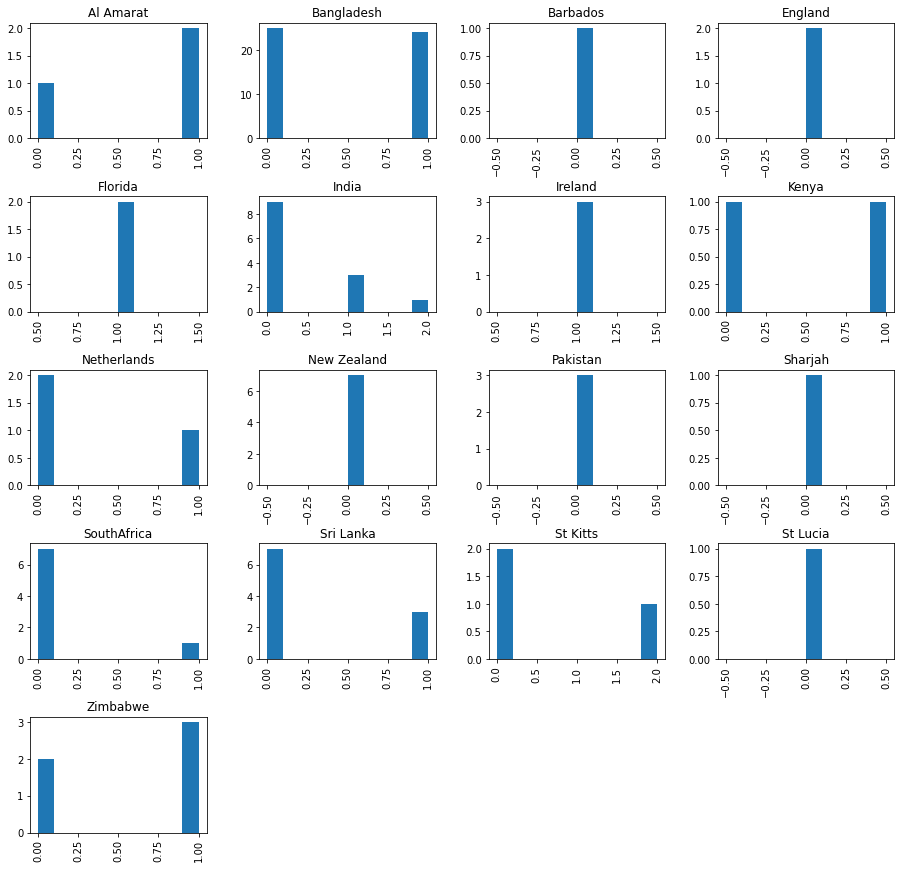

In [ ]:
dataset.hist(column='Result',by='Country', figsize= (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca04e0c2d0>,
      dtype=object)

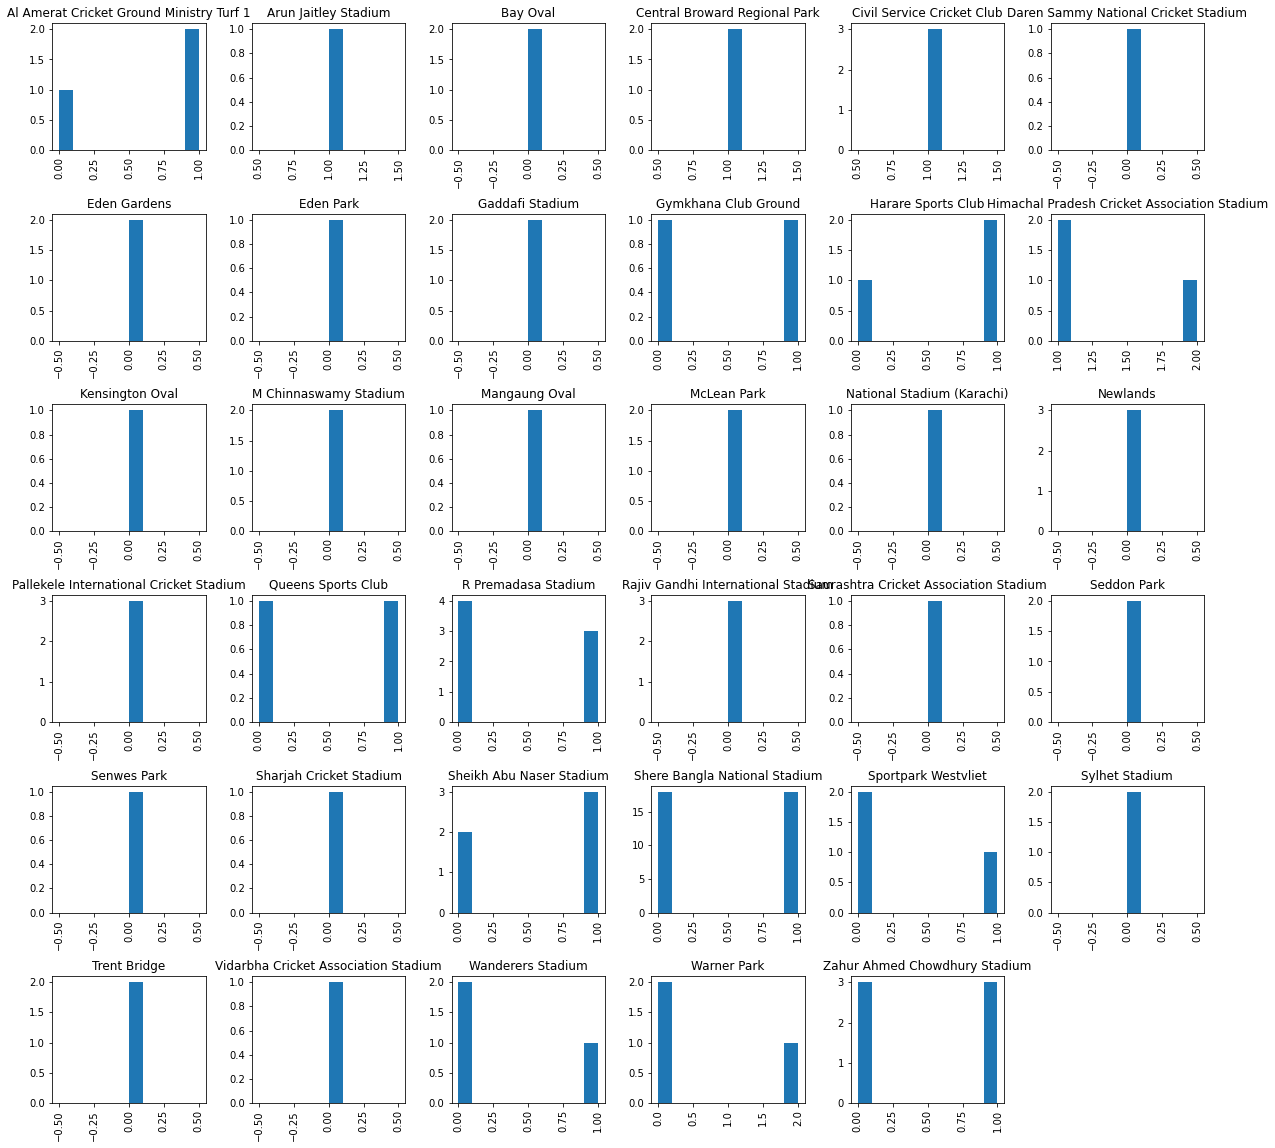

In [ ]:
dataset.hist(column='Result',by='\tGround', figsize= (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42a6b376d0>,
      dtype=object)

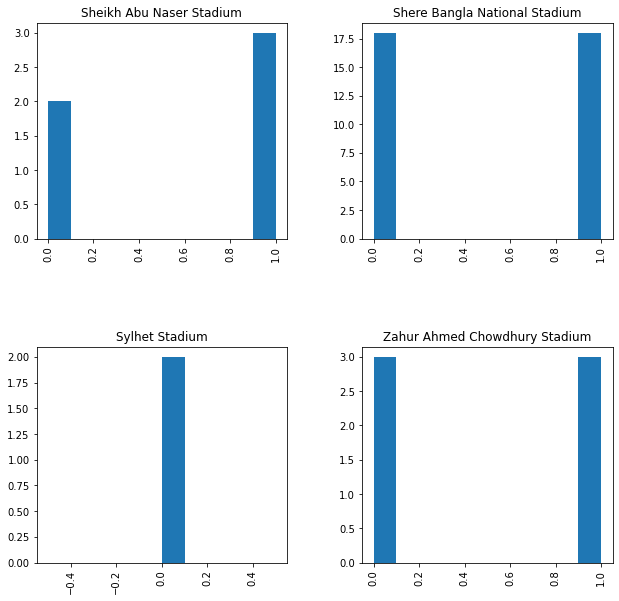

In [ ]:
home_match.hist(column='Result',by='\tGround', figsize= (10,10))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


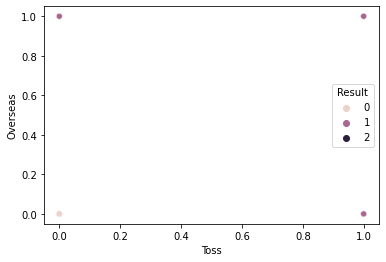

In [ ]:
sns.scatterplot(dataset["Toss"], dataset["Overseas"], hue=dataset["Result"])

In [ ]:
t

# Feature Selections

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

final_dataset = dataset



versus_encoder = LabelEncoder()
versus_encoder.fit(final_dataset['Versus'])
versus = versus_encoder.transform(final_dataset['Versus'])
final_dataset['Versus'] = versus

ground_encoder = LabelEncoder()
ground_encoder.fit(final_dataset['\tGround'])
ground = ground_encoder.transform(final_dataset['\tGround'])
final_dataset['\tGround'] = ground

country_encoder = LabelEncoder()
country_encoder.fit(final_dataset['Country'])
country = country_encoder.transform(final_dataset['Country'])
final_dataset['Country'] = country

continent_encoder = LabelEncoder()
continent_encoder.fit(final_dataset['Continent'])
continent = continent_encoder.transform(final_dataset['Continent'])
final_dataset['Continent'] = continent

print(final_dataset)
#final_dataset.replace({'Result':{'W':1,' W':1,'L':0,'L ':0,'NR':2}},inplace=True)

           Date  Versus  \tGround  ...  Continent  BatFirst  WorldCup
0    28/11/2006      18        26  ...          5         1         0
1    01/09/2007       6         9  ...          0         0         1
2    02/09/2007      11         9  ...          0         0         1
3    13/09/2007      17        33  ...          0         0         1
4    15/09/2007      14        17  ...          0         1         1
..          ...     ...       ...  ...        ...       ...       ...
113  19/10/2021      10         0  ...          4         1         1
114  21/10/2021      12         0  ...          4         1         1
115  24/10/2021      15        25  ...          4         1         1
116  27/10/2021       2        27  ...          4         0         1
117  29/10/2021      17        25  ...          4         0         1

[118 rows x 11 columns]


In [16]:
final_dataset.head(40)

,Date,Versus,\tGround,Result,Overseas,Toss,DayNight,Country,Continent,BatFirst,WorldCup
0,28/11/2006,18,26,1,0,0,0,2,5,1,0
1,01/09/2007,6,9,1,1,1,0,8,0,0,1
2,02/09/2007,11,9,0,1,1,0,8,0,0,1
3,13/09/2007,17,33,1,1,1,0,13,0,0,1
4,15/09/2007,14,17,0,1,0,1,13,0,1,1
5,16/09/2007,1,17,0,1,0,0,13,0,1,1
6,18/09/2007,15,33,0,1,1,1,13,0,0,1
7,20/09/2007,11,17,0,1,0,0,13,0,1,1
8,20/04/2008,11,16,0,1,0,1,11,5,0,0
9,05/11/2008,14,33,0,1,1,1,13,0,0,0


In [17]:

features = [ 'Versus', '\tGround', 'Overseas','Toss', 'DayNight', 'Country','Continent','BatFirst','WorldCup']
target = final_dataset['Result']
X = final_dataset[features]
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)


In [ ]:
X_test.head(40)

,Versus,\tGround,Overseas,Toss,DayNight,Country,Continent,BatFirst,WorldCup
24,9,18,1,1,1,14,5,0,1
4,14,17,1,0,1,13,0,1,1
7,11,17,1,0,0,13,0,1,1
33,0,28,0,1,1,2,5,0,1
1,6,9,1,1,0,8,0,0,1
15,1,12,1,0,0,3,2,0,1
106,1,28,0,1,1,2,5,1,0
61,9,6,1,0,1,6,5,0,1
84,17,28,0,1,1,2,5,0,0
110,9,28,0,0,1,2,5,0,0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_X_train = scaler.fit_transform(X_train)

norm_X_test = scaler.fit_transform(X_test)
norm_X_train = pd.DataFrame(data=norm_X_train,columns=X_train.columns)

norm_X_test = pd.DataFrame(data=norm_X_test,columns=X_test.columns)

In [19]:
def accuracy_metrics(y_test,predictions):
  from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
  precision = precision_score(y_test,predictions,average='micro')
  recall = recall_score(y_test,predictions,average='micro')
  f1_score = f1_score(y_test,predictions,average='micro')
  accuracy = accuracy_score(y_test,predictions)

  print('Accuracy score: {0:0.2f}'.format(
      accuracy))
  print('Average precision score: {0:0.2f}'.format(
      precision))
  print('recall score: {0:0.2f}'.format(
    recall))
  print('f1score: {0:0.2f}'.format(
    f1_score))

In [20]:
from sklearn.ensemble import RandomForestClassifier
rndcl = RandomForestClassifier(n_estimators=100)
rndcl.fit(X_train,y_train)
predictions = rndcl.predict(X_test)
accuracy_metrics(y_test,predictions)

Accuracy score: 0.50
Average precision score: 0.50
recall score: 0.50
f1score: 0.50


In [21]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(norm_X_train,y_train)
pred = model.predict(norm_X_test)
accuracy_metrics(y_test,pred)


Accuracy score: 0.54
Average precision score: 0.54
recall score: 0.54
f1score: 0.54


In [22]:
from sklearn.ensemble import AdaBoostClassifier
modl = AdaBoostClassifier()
modl.fit(norm_X_train,y_train)
preds = modl.predict(norm_X_test)
accuracy_metrics(y_test,preds)

Accuracy score: 0.67
Average precision score: 0.67
recall score: 0.67
f1score: 0.67


In [23]:
log_cols=[ 'Versus', '\tGround', 'Overseas','Toss', 'DayNight', 'Country','Continent','BatFirst','WorldCup']
log = pd.DataFrame(columns=log_cols)

log_entry = pd.DataFrame([['11','28','0','1','0','2','5','1','0']], columns=log_cols)
log = log.append(log_entry)



prediction = modl.predict(log)
prediction

array([0])

Versus       object
\tGround     object
Overseas     object
Toss         object
DayNight     object
Country      object
Continent    object
BatFirst     object
WorldCup     object
dtype: object

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
mdl = GradientBoostingClassifier()
mdl.fit(norm_X_train,y_train)
pre = mdl.predict(norm_X_test)
accuracy_metrics(y_test,pre)

Accuracy score: 0.58
Average precision score: 0.58
recall score: 0.58
f1score: 0.58


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

param_dist = {
 'n_estimators': [50, 100,200,500],
 'learning_rate' : [0.001,0.01,0.05,0.1,0.3,1],
 
 }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
pre_gs_inst = GridSearchCV(modl,
 param_grid = param_dist,
 cv=cv,
 
 n_jobs=-1)

model = pre_gs_inst.fit(norm_X_train, y_train)
# Print the tuned parameters and score
print("Tuned  Parameters: {}".format(pre_gs_inst.best_params_))
prd_test = model.predict(norm_X_test)
accuracy_metrics(y_test,prd_test)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


Tuned  Parameters: {'learning_rate': 0.001, 'n_estimators': 50}
Accuracy score: 0.54
Average precision score: 0.54
recall score: 0.54
f1score: 0.54


In [26]:
sklearn.discriminant_analysis.LinearDiscriminantAnalysis
Quadratic

NameError: ignored

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mdl =LinearDiscriminantAnalysis()
mdl.fit(norm_X_train,y_train)
pre = mdl.predict(norm_X_test)
accuracy_metrics(y_test,pre)

Accuracy score: 0.58
Average precision score: 0.58
recall score: 0.58
f1score: 0.58


In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
mdl =QuadraticDiscriminantAnalysis()
mdl.fit(norm_X_train,y_train)
pre = mdl.predict(norm_X_test)
accuracy_metrics(y_test,pre)

Accuracy score: 0.58
Average precision score: 0.58
recall score: 0.58
f1score: 0.58


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [29]:
prediction = mdl.predict(log)
prediction

array([0])

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()



n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
best_model = rf_random.fit(X_train,y_train)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

prediction = best_model.predict(X_test)

accuracy_metrics(y_test,prediction)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 40, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}  

Accuracy score: 0.67
Average precision score: 0.67
recall score: 0.67
f1score: 0.67


In [ ]:

log_cols=[ 'Versus', '\tGround', 'Overseas','Toss', 'DayNight', 'Country','Continent','BatFirst','WorldCup']
log = pd.DataFrame(columns=log_cols)

log_entry = pd.DataFrame([['14','27','1','1','0','12','4','1','1']], columns=log_cols)
log = log.append(log_entry)



prediction = best_model.predict(log)
prediction

array([0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  GridSearchCV
knn = KNeighborsClassifier()
grid_params = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gs = GridSearchCV(knn,grid_params,verbose=1,cv=3,n_jobs =-1)

model = gs.fit(norm_X_train,y_train)
print('best params:',gs.best_params_)
print('best score:',gs.best_score_)

prd = model.predict(norm_X_test)
accuracy_metrics(y_test,prd)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


best params: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
best score: 0.6491935483870966
Accuracy score: 0.46
Average precision score: 0.46
recall score: 0.46
f1score: 0.46


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
model_tf = keras.Sequential([
    layers.BatchNormalization(),                       
    layers.Dense(1024, activation='relu', input_shape=[6]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,activation='softmax'),
])

In [ ]:
model_tf.compile(
    optimizer='sgd',
    loss='Hinge',
    metrics=['accuracy']
)

In [ ]:
history = model_tf.fit(
    norm_X_train, y_train,
    validation_data=(norm_X_test, y_test),
    batch_size=8,
    epochs=500,
    callbacks=[early_stopping], 
)

Epoch 1/500
12/12 [==============================] - 3s 95ms/step - loss: 1.1915 - accuracy: 0.3298 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 2/500
12/12 [==============================] - 1s 68ms/step - loss: 1.2447 - accuracy: 0.3298 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 3/500
12/12 [==============================] - 1s 66ms/step - loss: 1.1915 - accuracy: 0.3298 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 4/500
12/12 [==============================] - 1s 65ms/step - loss: 1.2021 - accuracy: 0.3298 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 5/500
12/12 [==============================] - 1s 65ms/step - loss: 1.1809 - accuracy: 0.3298 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 6/500
12/12 [==============================] - 1s 68ms/step - loss: 1.1702 - accuracy: 0.3298 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 7/500
12/12 [==============================] - 1s 66ms/step - loss: 1.2234 - accuracy: 0.3298 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 

Minimum Validation Loss: 1.0000


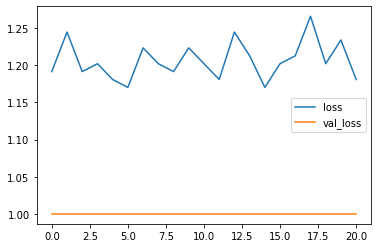

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Versus       float64
\tGround     float64
Overseas     float64
Toss         float64
DayNight     float64
Country      float64
Continent    float64
BatFirst     float64
WorldCup     float64
dtype: object

In [ ]:

pred = model_tf.predict(norm_X_test)
accuracy_metrics(y_test,pred)


Accuracy score: 0.50
Average precision score: 0.50
recall score: 0.50
f1score: 0.50


In [ ]:
test = log.astype(float)

model_tf.predict(test)

array([[1.]], dtype=float32)

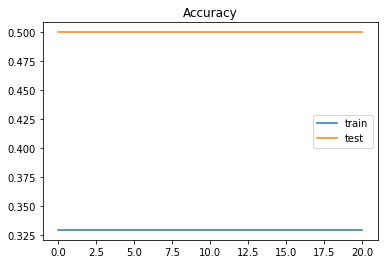

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()